In [47]:
import pandas as pd
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


PATH_DATA_IN = r'G:\My Drive\MasterThesis\Data\Meli\Clean\CABA\Alquiler'

# Download data
path = os.path.join(PATH_DATA_IN, "meli_clean_alquiler_2018_2022.csv")
df = pd.read_csv(path)

# Convert the 'listing_month' column to datetime format
df['listing_month'] = pd.to_datetime(df['listing_month'])

df.head()

,id,listing_month,commune,house,neighbourhood,listing_type,listing_age,year,semester,quarter,month,price_realpesos,price_usd,price_realpesos_per_covered_sqm,price_usd_per_covered_sqm,invoiced_in_usd,total_area,covered_area,uncovered_area,bedrooms,bathrooms,rooms,property_age,pool,security,furnished,heating,air_conditioning,parking,common_space,fitness_space,distance_to_transport,distance_to_greenspace,distance_to_cbd,longitude,latitude
0,702933219,2018-01-01,COMUNA 1,0,CONSTITUCION,ALQUILER,13,2018,1,1,1,88452.092588,513.897409,2764.127893,16.059294,0,32,32,0,1,1,1,1.0,0,0,0,0,1,0,1,0,237.485276,782.266376,1602.363718,-58.384193,-34.617988
1,698281355,2018-02-01,COMUNA 1,0,CONSTITUCION,ALQUILER,74,2018,1,1,2,69788.237176,406.389344,1073.665187,6.252144,0,65,65,0,2,1,3,50.0,0,0,0,0,0,0,0,0,599.783773,411.387370,2841.485500,-58.387475,-34.628829
2,696559219,2018-01-01,COMUNA 1,0,CONSTITUCION,ALQUILER,52,2018,1,1,1,107214.657682,622.905951,1429.528769,8.305413,0,79,75,4,3,2,4,20.0,0,0,0,0,0,0,0,0,900.364426,265.997915,3286.982991,-58.389738,-34.632526
3,700922513,2018-01-01,COMUNA 1,0,CONSTITUCION,ALQUILER,25,2018,1,1,1,116149.212489,674.814780,3226.367014,18.744855,0,40,36,4,1,1,1,0.0,1,1,1,1,1,0,1,1,335.551581,751.431511,1917.516714,-58.387964,-34.620156
4,704907347,2018-01-01,COMUNA 1,0,CONSTITUCION,ALQUILER,2,2018,1,1,1,71476.438455,415.270634,1520.775286,8.835545,0,47,47,0,1,1,2,0.0,0,0,0,0,0,0,0,0,357.911737,293.744309,2909.308282,-58.384171,-34.629822


In [49]:
df.columns

Index(['id', 'listing_month', 'commune', 'house', 'neighbourhood', 'listing_type', 'listing_age', 'year', 'semester', 'quarter', 'month', 'price_realpesos', 'price_usd', 'price_realpesos_per_covered_sqm', 'price_usd_per_covered_sqm', 'invoiced_in_usd', 'total_area', 'covered_area', 'uncovered_area', 'bedrooms', 'bathrooms', 'rooms', 'property_age', 'pool', 'security', 'furnished', 'heating', 'air_conditioning', 'parking', 'common_space', 'fitness_space', 'distance_to_transport', 'distance_to_greenspace', 'distance_to_cbd', 'longitude', 'latitude'], dtype='object')

In [5]:
df.dtypes

id                                          int64
listing_month                      datetime64[ns]
commune                                    object
house                                       int64
neighbourhood                              object
listing_type                               object
listing_age                                 int64
year                                        int64
semester                                    int64
quarter                                     int64
month                                       int64
price_realpesos                           float64
price_usd                                 float64
price_realpesos_per_covered_sqm           float64
price_usd_per_covered_sqm                 float64
invoiced_in_usd                             int64
total_area                                  int64
covered_area                                int64
uncovered_area                              int64
bedrooms                                    int64


In [6]:
DEP_VAR = ['price_realpesos']
INDEP_VARS = ['house', 'covered_area', 'uncovered_area', 'bedrooms', 'bathrooms', 
       'pool', 'security', 'furnished', 'heating', 'air_conditioning',
       'parking', 'common_space', 'fitness_space',
       'distance_to_transport', 'distance_to_greenspace',
       'longitude', 'latitude']
# Distance to CBD se va porque es muy colineal con longitud

In [7]:
df[INDEP_VARS].dtypes

house                       int64
covered_area                int64
uncovered_area              int64
bedrooms                    int64
bathrooms                   int64
pool                        int64
security                    int64
furnished                   int64
heating                     int64
air_conditioning            int64
parking                     int64
common_space                int64
fitness_space               int64
distance_to_transport     float64
distance_to_greenspace    float64
longitude                 float64
latitude                  float64
dtype: object

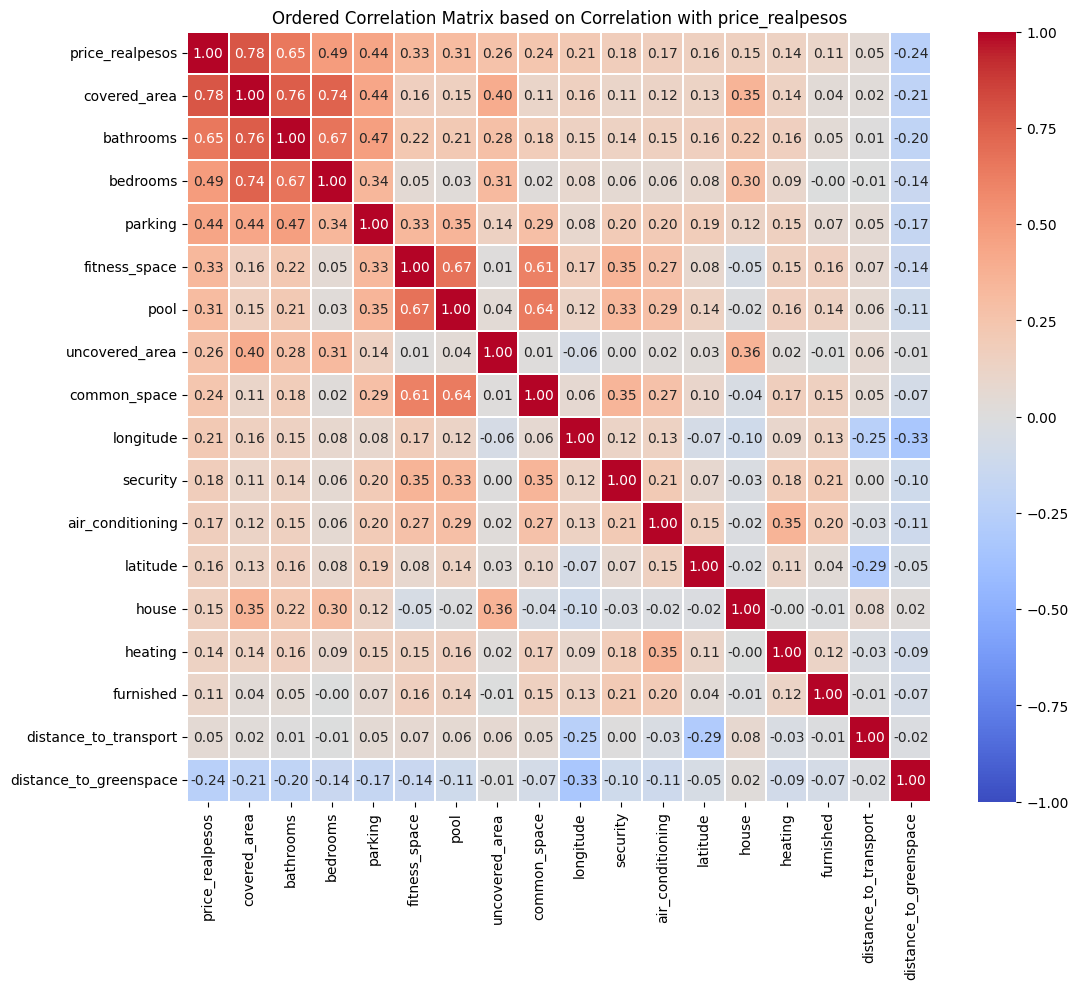

In [8]:
# Corr matrix

import matplotlib.pyplot as results
import seaborn as sns

# # Calculate correlation matrix
# corr_matrix = df[INDEP_VARS + DEP_VAR].corr()

# Calculate correlation with 'price_realpesos'
correlation_with_price = df[INDEP_VARS + DEP_VAR].corr()['price_realpesos'].sort_values(ascending=False)

# Order the correlation matrix by the calculated correlation with 'price_realpesos'
ordered_corr_matrix = df[INDEP_VARS + DEP_VAR][correlation_with_price.index].corr()

# Plot the ordered correlation matrix
results.figure(figsize=(12, 10))
sns.heatmap(ordered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.2)
results.title('Ordered Correlation Matrix based on Correlation with price_realpesos')
results.show()

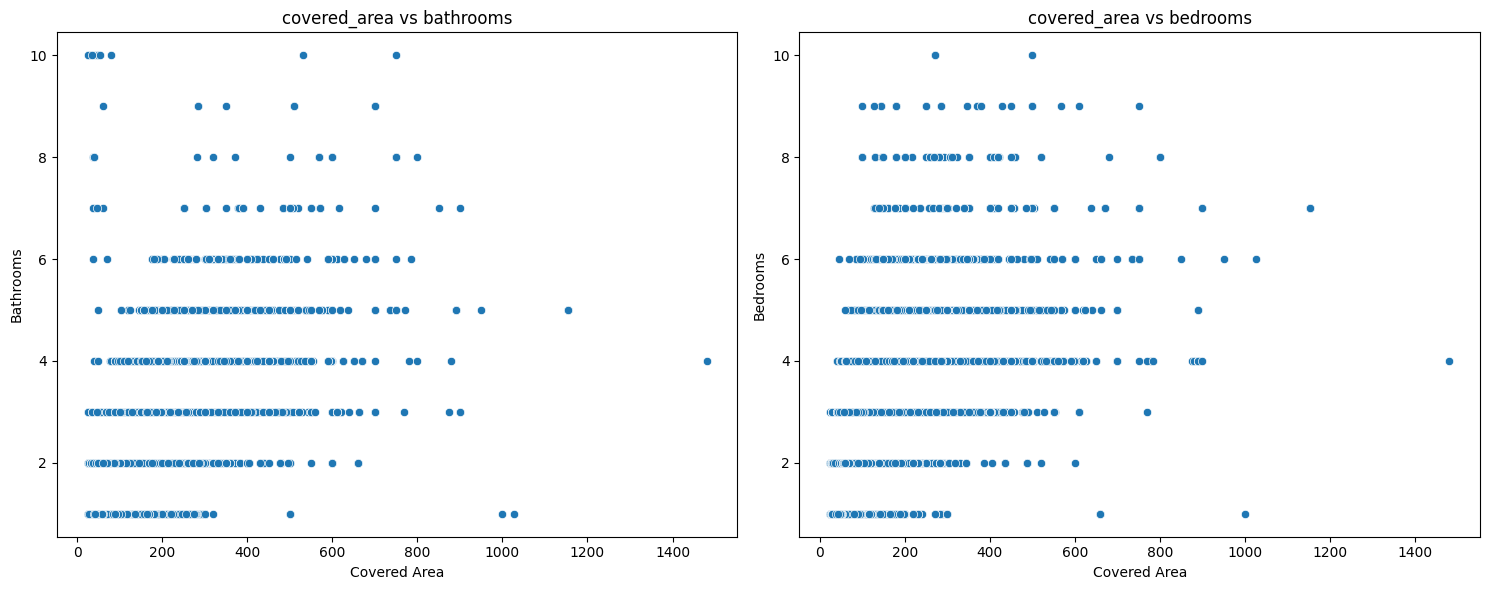

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot of 1 row and 2 columns to place both scatter plots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of covered_area vs bathrooms
sns.scatterplot(data=df, x='covered_area', y='bathrooms', ax=ax[0])
ax[0].set_title('covered_area vs bathrooms')
ax[0].set_xlabel('Covered Area')
ax[0].set_ylabel('Bathrooms')

# Scatter plot of covered_area vs bedrooms
sns.scatterplot(data=df, x='covered_area', y='bedrooms', ax=ax[1])
ax[1].set_title('covered_area vs bedrooms')
ax[1].set_xlabel('Covered Area')
ax[1].set_ylabel('Bedrooms')

results.tight_layout()
results.show()


In [10]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def calculate_vif(df):
    """
    Calculate VIF for a DataFrame.
    
    Args:
    - df (pd.DataFrame): DataFrame with variables to calculate VIF for.
    
    Returns:
    - pd.DataFrame: DataFrame with VIF values.
    """
    # Add a constant column for intercept
    df = add_constant(df)
    
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif_data
vif_data = calculate_vif(df[INDEP_VARS]).sort_values('VIF', ascending=False)
print(vif_data)

                  Variable           VIF
0                    const  6.374439e+06
2             covered_area  3.564337e+00
5                bathrooms  2.773037e+00
4                 bedrooms  2.468461e+00
6                     pool  2.256410e+00
13           fitness_space  2.163706e+00
12            common_space  1.967208e+00
11                 parking  1.487444e+00
16               longitude  1.369120e+00
3           uncovered_area  1.291221e+00
10        air_conditioning  1.281204e+00
1                    house  1.276595e+00
14   distance_to_transport  1.259968e+00
17                latitude  1.245802e+00
7                 security  1.243456e+00
15  distance_to_greenspace  1.191165e+00
9                  heating  1.179992e+00
8                furnished  1.090622e+00


In [11]:
# LASSO
from sklearn.linear_model import LassoCV

y = df[DEP_VAR]
X = df[INDEP_VARS]

# Assuming X and y are already defined with your features and target variable, respectively

# Perform LASSO with cross-validation
lasso = LassoCV(cv=10).fit(X, y)

# Get retained features (non-zero coefficients)
retained_features = X.columns[lasso.coef_ != 0].tolist()

print(f"Retained features: {retained_features}")

c:\Python\Python396\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Retained features: ['covered_area', 'uncovered_area', 'distance_to_transport', 'distance_to_greenspace']


In [12]:
# # LASSO (with tuning)

# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV

# y = df[DEP_VAR]
# X = df[INDEP_VARS]

# # Define a range of alphas to try for hyperparameter tuning
# alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# # Define the grid of hyperparameters to search
# param_grid = {
#     'alpha': alphas
# }

# # Use grid search with cross-validation
# grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=10)
# grid.fit(X, y)

# # Get the best LASSO model
# best_lasso = grid.best_estimator_

# # Get retained features (non-zero coefficients)
# retained_features = X.columns[best_lasso.coef_ != 0].tolist()
# discarded_features = X.columns[best_lasso.coef_ == 0].tolist()

# print(f"Best alpha: {grid.best_params_['alpha']}")
# print(f"Retained features: {retained_features}")
# print(f"Discarded features: {discarded_features}")


In [13]:
# Permutation feature importance + XGBoost

import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

y = df[DEP_VAR]
X = df[INDEP_VARS]

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model using XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)
model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=42)

# Get feature importances and corresponding feature names
feature_importances = result.importances_mean
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(importance_df)

# To filter and retain only important features, set a threshold (e.g., threshold = 0.01)
# This is just an example threshold; you can set it based on domain knowledge or other criteria.
important_features = importance_df[importance_df['importance'] > 0.01]['feature'].tolist()

print(f"Important features based on permutation importance: {important_features}")

                   feature  importance
1             covered_area    0.880914
15               longitude    0.221311
16                latitude    0.160210
13   distance_to_transport    0.037433
14  distance_to_greenspace    0.033931
4                bathrooms    0.025224
2           uncovered_area    0.018681
3                 bedrooms    0.014869
12           fitness_space    0.012426
5                     pool    0.009750
10                 parking    0.008164
7                furnished    0.005231
8                  heating    0.004285
11            common_space    0.003679
0                    house    0.002649
9         air_conditioning    0.001568
6                 security    0.000726
Important features based on permutation importance: ['covered_area', 'longitude', 'latitude', 'distance_to_transport', 'distance_to_greenspace', 'bathrooms', 'uncovered_area', 'bedrooms', 'fitness_space']


In [14]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split, GridSearchCV

# y = results[DEP_VAR]
# X = results[INDEP_VARS]

# # Split data for training and validation
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define hyperparameters to tune
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'max_depth': [3, 4, 5, 6, 7],
#     'subsample': [0.7, 0.8, 0.9, 1],
#     'colsample_bytree': [0.7, 0.8, 0.9, 1],
#     'gamma': [0, 0.1, 0.2]
# }

# # Use GridSearchCV with XGBoost
# grid = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42), 
#                     param_grid, 
#                     cv=5, 
#                     scoring='neg_mean_squared_error', 
#                     verbose=1, 
#                     n_jobs=-1)
# grid.fit(X_train, y_train)

# # Get the best estimator
# best_model = grid.best_estimator_

# # Calculate permutation feature importance for the best model
# result = permutation_importance(best_model, X_val, y_val, n_repeats=30, random_state=42)

# # Get feature importances and corresponding feature names
# feature_importances = result.importances_mean
# feature_names = X.columns

# # Create a DataFrame for visualization
# importance_results = pd.DataFrame({
#     'feature': feature_names,
#     'importance': feature_importances
# }).sort_values(by='importance', ascending=False)

# print(importance_results)

# # Filter and retain important features based on a threshold
# important_features = importance_results[importance_results['importance'] > 0.01]['feature'].tolist()

# print(f"Important features based on permutation importance: {important_features}")


In [15]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# FIRST EXPERIMENT: 
# 

# Error metric: Mean Absolute Percentage Error (MAPE)

unique_months = sorted(df["listing_month"].unique())

results = pd.DataFrame(
    {'month': unique_months,
     'mape': np.nan,
     'rmse': np.nan})

for month in unique_months[1:]:

    # print(f"Starting estimation for month: {month} \n")

    # Define test sample as current month, and all the past as train
    X_test = df[df['listing_month'] == month][INDEP_VARS]
    y_test = df[df['listing_month'] == month][DEP_VAR]
    X_train = df[df['listing_month'] < month][INDEP_VARS]
    y_train = df[df['listing_month'] < month][DEP_VAR]

    # Train the model with default values for most parameters
    model = xgb.XGBRegressor(objective ='reg:squarederror', seed=789)
    model.fit(X_train, y_train)
    
    # Predict and calculate error metrics
    y_pred = model.predict(X_test)

    mape = mean_absolute_percentage_error(y_pred, y_test)
    results.loc[results['month'] == month, 'mape'] = mape

    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    results.loc[results['month'] == month, 'rmse'] = rmse
    

print(results.head())

       month      mape          rmse
0 2018-01-01       NaN           NaN
1 2018-02-01  0.159365  60579.434271
2 2018-03-01  0.156645  59490.773265
3 2018-04-01  0.156263  84885.446086
4 2018-05-01  0.157486  92770.897143


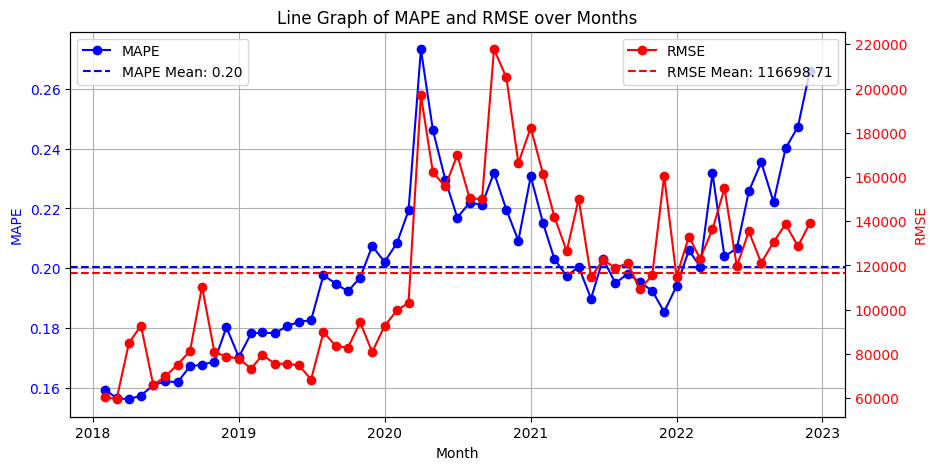

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Optional: Set the figure size

# Create the primary y-axis
ax1 = plt.gca()  # Get the current Axes instance
ax1.plot(results['month'], results['mape'], marker='o', color='blue', label='MAPE')  # Plot mape against month with markers
ax1.set_xlabel('Month')  # Set the label for the x-axis
ax1.set_ylabel('MAPE', color='blue')  # Set the label for the primary y-axis
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis tick labels to match the line color
ax1.grid(True)  # Optional: Display a grid for easier readability

# Add a horizontal line for the mean of the 'mape' column on the primary y-axis
mape_mean = results['mape'].mean()
ax1.axhline(y=mape_mean, color='blue', linestyle='--', label=f'MAPE Mean: {mape_mean:.2f}')

# Create the secondary y-axis
ax2 = ax1.twinx()  # Create a secondary y-axis sharing the same x-axis
ax2.plot(results['month'], results['rmse'], marker='o', color='red', label='RMSE')  # Plot rmse against month with markers on the secondary y-axis
ax2.set_ylabel('RMSE', color='red')  # Set the label for the secondary y-axis
ax2.tick_params(axis='y', labelcolor='red')  # Set the color of the y-axis tick labels to match the line color

# Add a horizontal line for the mean of the 'rmse' column on the secondary y-axis
rmse_mean = results['rmse'].mean()
ax2.axhline(y=rmse_mean, color='red', linestyle='--', label=f'RMSE Mean: {rmse_mean:.2f}')

# Set the title of the graph
plt.title('Line Graph of MAPE and RMSE over Months')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Display the plot


In [17]:
# XGBoost's parameters

# max_depth: the maximum depth the trees can have (too high can lead to overfitting)
# subsample: the percentage of the data that is used to build each tree (too high can lead to overfitting) (between 0 and 1)
# colsample_bylevel, colsample_bylevel, colsample_bynode: a family of parameters for subsampling columns 

param_grid = {

    # Leraning
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators' : [50, 100, 200],

    # Tree
    'max_depth': [3, 5, 7], 
    'min_child_weight': [1, 3, 5],

    'gamma': [0, 0.2, 0.4],

    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],

    # Regularization
    'reg_alpha':[0.001, 1, 100]
    
}


In [18]:
param_grid_1 = {

    # Leraning
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators' : [50, 100, 200],

    # Tree
    'max_depth': [3, 5, 7], 
    'min_child_weight': [1, 3, 5],
    
}

param_grid_2 = {

    # Tree
    'gamma': [0, 0.2, 0.4],

    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],

    # Regularization
    'reg_alpha':[0.001, 1, 100]
    
}

In [41]:
# Test function
import estimate_xgboost
import importlib
importlib.reload(estimate_xgboost)

res = estimate_xgboost.estimate_xgb(df=df.sample(n=10000),
                                    starting_month=57,
                                    DEP_VAR=DEP_VAR, 
                                    INDEP_VARS=INDEP_VARS,
                                    parameter_grid_1=param_grid_1,
                                    parameter_grid_2=param_grid_2,
                                    verbose=True,
                                    sample_weights='quadratic',
                                    cv_strategy='timeseries_split')


Starting estimation for month: 2022-11-01T00:00:00.000000000 

Best parameters from round 1: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50}
Best parameters from round 2: {'colsample_bytree': 1, 'gamma': 0, 'reg_alpha': 100, 'subsample': 0.75}
Time taken for month 2022-11-01T00:00:00.000000000: 8.45 seconds

Starting estimation for month: 2022-12-01T00:00:00.000000000 

Best parameters from round 1: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}
Best parameters from round 2: {'colsample_bytree': 1, 'gamma': 0, 'reg_alpha': 0.001, 'subsample': 0.5}
Time taken for month 2022-12-01T00:00:00.000000000: 8.50 seconds

Total execution time: 16.96 seconds


In [42]:
res

,month,rmse,mae,mape,max_depth,reg_alpha,min_child_weight,n_estimators,learning_rate,gamma,colsample_bytree,subsample
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Optional: Set the figure size

# Create the primary y-axis
ax1 = plt.gca()  # Get the current Axes instance
ax1.plot(res['month'], res['rmse'], marker='o', color='blue', label='RMSE')  # Plot mape against month with markers
ax1.set_xlabel('Month')  # Set the label for the x-axis
ax1.set_ylabel('RMSE', color='blue')  # Set the label for the primary y-axis
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis tick labels to match the line color
ax1.grid(True)  # Optional: Display a grid for easier readability

# Add a horizontal line for the mean of the 'mape' column on the primary y-axis
rmse_mean = res['rmse'].mean()
ax1.axhline(y=rmse_mean, color='blue', linestyle='--', label=f'RMSE Mean: {rmse_mean:.2f}')

# Set the title of the graph
plt.title('Line Graph of RMSE over Months')

# Display legends
ax1.legend(loc='upper left')

plt.show()  # Display the plot


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Optional: Set the figure size

# Create the primary y-axis
ax1 = plt.gca()  # Get the current Axes instance
ax1.plot(res['month'], res['rmse'], marker='o', color='blue', label='RMSE')  # Plot mape against month with markers
ax1.set_xlabel('Month')  # Set the label for the x-axis
ax1.set_ylabel('RMSE', color='blue')  # Set the label for the primary y-axis
ax1.tick_params(axis='y', labelcolor='blue')  # Set the color of the y-axis tick labels to match the line color
ax1.grid(True)  # Optional: Display a grid for easier readability

# Add a horizontal line for the mean of the 'mape' column on the primary y-axis
rmse_mean = res['rmse'].mean()
ax1.axhline(y=rmse_mean, color='blue', linestyle='--', label=f'RMSE Mean: {rmse_mean:.2f}')

# Set the title of the graph
plt.title('Line Graph of RMSE over Months')

# Create the secondary y-axis
ax2 = ax1.twinx()  # Create a secondary y-axis sharing the same x-axis
ax2.plot(results['month'], results['rmse'], marker='o', color='red', label='RMSE2')  # Plot rmse against month with markers on the secondary y-axis
ax2.set_ylabel('RMSE2', color='red')  # Set the label for the secondary y-axis
ax2.tick_params(axis='y', labelcolor='red')  # Set the color of the y-axis tick labels to match the line color

# Add a horizontal line for the mean of the 'rmse' column on the secondary y-axis
rmse2_mean = results['rmse'].mean()
ax2.axhline(y=rmse2_mean, color='red', linestyle='--', label=f'RMSE2 Mean: {rmse_mean:.2f}')

# Set the title of the graph
plt.title('Line Graph of RMSE and RMSE2 over Months')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Display the plot